In [1]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from datasist.structdata import detect_outliers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.drop('Cabin', axis=1, inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

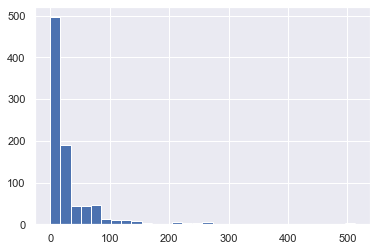

In [7]:
df['Fare'].hist(bins=30)

In [8]:
outliers = detect_outliers(df, 0, ['Fare'])
df.loc[outliers, 'Fare'] = np.nan
len(outliers)

114

In [9]:
custom_outliers = df[(df['Fare'] == 0) | (df['Fare'] > 200)].index
df.loc[custom_outliers, 'Fare'] = np.nan

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         760 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 115.6+ KB


In [11]:
df.isnull().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.910011
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare           14.510686
Embarked        0.000000
dtype: float64

In [12]:
imputer = KNNImputer()
for col in ['Fare', 'Age']:
    df[col] = imputer.fit_transform(df[[col]])

In [13]:
df.isnull().sum()*100/len(df)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [14]:
df.drop(['Ticket', 'Name'], axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.250000,S
1,2,1,1,female,38.000000,1,0,18.173842,C
2,3,1,3,female,26.000000,0,0,7.925000,S
3,4,1,1,female,35.000000,1,0,53.100000,S
4,5,0,3,male,35.000000,0,0,8.050000,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.000000,S
887,888,1,1,female,19.000000,0,0,30.000000,S
888,889,0,3,female,29.642093,1,2,23.450000,S
889,890,1,1,male,26.000000,0,0,30.000000,C


In [15]:
df = pd.get_dummies(df, drop_first=True, columns=['Sex', 'Embarked'])
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.250000,1,0,1
1,2,1,1,38.000000,1,0,18.173842,0,0,0
2,3,1,3,26.000000,0,0,7.925000,0,0,1
3,4,1,1,35.000000,1,0,53.100000,0,0,1
4,5,0,3,35.000000,0,0,8.050000,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.000000,1,0,1
887,888,1,1,19.000000,0,0,30.000000,0,0,1
888,889,0,3,29.642093,1,2,23.450000,0,0,1
889,890,1,1,26.000000,0,0,30.000000,1,0,0


In [16]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15)

In [18]:
y_train.value_counts()

0    462
1    293
Name: Survived, dtype: int64

In [19]:
sampler = SMOTE()
x_train, y_train = sampler.fit_resample(x_train, y_train)
y_train.value_counts()

0    462
1    462
Name: Survived, dtype: int64

In [20]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='error'),
    "Naive Bayes": GaussianNB()
}

In [22]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # print(classification_report(y_test, y_pred))
    print(
        f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.816017316017316
Testing Accuracy: 0.8134328358208955
Testing Confusion Matrix: 
[[69 18]
 [ 7 40]]
Testing Recall: 0.851063829787234
Testing Precesion: 0.6896551724137931
Testing F-1: 0.761904761904762
Testing F-Beta: 0.7168458781362007
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.8722943722943723
Testing Accuracy: 0.8208955223880597
Testing Confusion Matrix: 
[[71 16]
 [ 8 39]]
Testing Recall: 0.8297872340425532
Testing Precesion: 0.7090909090909091
Testing F-1: 0.764705882352941
Testing F-Beta: 0.7303370786516854
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.8517316017316018
Testing Accuracy: 0.8805970149253731
Testing Confusion Matrix: 
[[78  9]
 [ 7 40]]
Testing Recall: 0.851063829787234
Testing Precesion: 0.8163265306122449
Testing F-1: 0.8333333333333334
Testing F-Beta: 0.8230452674897119
------------------------------
Training Model DT 
------

In [23]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
print(f'Testing Precesion: {precision_score(y_test, y_pred)}')

Training Accuracy: 0.8517316017316018
Testing Accuracy: 0.8805970149253731
Testing Recall: 0.851063829787234
Testing Precesion: 0.8163265306122449


In [25]:
import joblib
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']